Nesta atividade, você realizará uma análise de dados clínicos utilizando o Pima Indians Diabetes Dataset, um conjunto de dados amplamente utilizado em estudos sobre diabetes. Este dataset contém variáveis relacionadas à saúde de mulheres de origem Pima, como níveis de glicose, pressão arterial e índice de massa corporal (IMC), além de informações sobre idade e histórico familiar de diabetes.

Você será responsável por realizar a leitura, tratamento e visualização dos dados, com o objetivo de extrair insights sobre os pacientes e preparar os dados para análises futuras.

## Objetivo:
- Ler e explorar o Pima Indians Diabetes Dataset em formato CSV.
- Realizar o tratamento de variáveis, incluindo transformações numéricas e imputação de valores ausentes.
- Sumarizar as informações com estatísticas descritivas.
- Visualizar a distribuição de uma variável através de um histograma.

O Pima Indians Diabetes Dataset contém as seguintes colunas:
- Pregnancies: Número de gravidezes
- Glucose: Nível de glicose no sangue
- BloodPressure: Pressão arterial
- SkinThickness: Espessura da pele
- Insulin: Níveis de insulina
- BMI: Índice de massa corporal
- DiabetesPedigreeFunction: Histórico familiar de diabetes
- Age: Idade
- Outcome: Diagnóstico de diabetes (0 ou 1)
- Esses dados podem ser utilizados diretamente no exemplo que você propôs, substituindo os nomes das colunas no código para corresponder aos dados do dataset.

## Instruções:
1. Carregue o dataset:
Baixe o Pima Indians Diabetes Dataset de Kaggle e carregue-o no seu ambiente de programação. O arquivo diabetes.csv contém as informações necessárias.
2. Exploração Inicial:
- Exiba as primeiras 5 linhas do dataset para se familiarizar com as variáveis.
- Verifique a existência de valores ausentes e o tipo de dados de cada coluna.
3. Transformações e Tratamento de Dados:
- Imputação de Missing Values: Se houver valores ausentes na variável Glucose, substitua-os pela mediana.
- Transformação Numérica: Normalize a variável Age entre 0 e 1 para padronizar os valores.
4. Sumarização Estatística:
- Gere estatísticas descritivas das colunas Age, BloodPressure (pressão arterial), e Glucose (glicose), apresentando média, mediana, desvio padrão, valores mínimos e máximos.
5. Visualização dos Dados:
- Crie um histograma para visualizar a distribuição da variável Age.
6. Teste de Correlação:
- Realize um teste de correlação de Pearson entre as variáveis numéricas (Glucose, BMI, Age, etc.) e a variável Outcome (presença de diabetes).
7. Construção do Modelo de Regressão Logística:
- Separe os dados em variáveis independentes (X) e a variável dependente (y), onde y será a coluna Outcome (1 para presença de diabetes e 0 para ausência).
8. Avaliação do Modelo:
- Faça previsões usando o conjunto de teste e avalie o desempenho do modelo com base em acurácia, matriz de confusão e relatório de classificação.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Carregar o dataset
df = pd.read_csv('data/diabetes.csv')

In [3]:
# Transformação de dados
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].median())  # Imputação de valores ausentes
df['Age_normalized'] = (df['Age'] - df['Age'].min()) / (df['Age'].max() - df['Age'].min())  # Normalização da idade


In [4]:
# Estatísticas descritivas
estatisticas = df[['Age', 'BloodPressure', 'Glucose']].describe()
print(estatisticas)

              Age  BloodPressure     Glucose
count  768.000000     768.000000  768.000000
mean    33.240885      69.105469  120.894531
std     11.760232      19.355807   31.972618
min     21.000000       0.000000    0.000000
25%     24.000000      62.000000   99.000000
50%     29.000000      72.000000  117.000000
75%     41.000000      80.000000  140.250000
max     81.000000     122.000000  199.000000


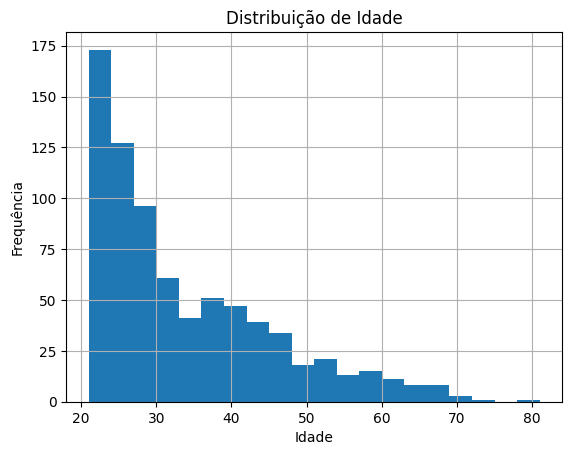

In [5]:
# Visualização
df['Age'].hist(bins=20)
plt.title('Distribuição de Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

In [6]:
# Correlação de Pearson
correlacao = df.corr(method='pearson')
print(correlacao['Outcome'].sort_values(ascending=False))

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age_normalized              0.238356
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Definir X e y
X = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age_normalized']]
y = df['Outcome']

# Dividir o dataset em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalar os dados
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ajustar o modelo com os dados escalados
model = LogisticRegression(max_iter=200)  # Também pode ajustar o max_iter
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=200)

In [12]:
# Previsões com os dados escalados
y_pred = model.predict(X_test_scaled)

# Avaliação do modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

Acurácia: 0.7186147186147186
Matriz de Confusão:
 [[118  33]
 [ 32  48]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78       151
           1       0.59      0.60      0.60        80

    accuracy                           0.72       231
   macro avg       0.69      0.69      0.69       231
weighted avg       0.72      0.72      0.72       231

